# Wine Quality Test Using Support Vector Classifier

## Table of Content

  ###  1. What is Support Vector Machine?
  ###  2. Importing Libraries
  ###  3. Uploading Dataset
  ###  4. Data PreProcessing
  ###  5. Feature Scaling
  ###  6. EDA
  ###  7. Data Splitting
  ###  8. Model Selection and Training
  ###  9. Model Evaluation
  ### 10. Conclusion

## 1. What is Support Vector Machine?

  ### Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
  
  ### The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
  
  ### There are two types of SVM:-
      1. Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
      
      2. Non-Linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 3. Uploading DataSet

In [2]:
WineQT_data = pd.read_csv('WineQT.csv')
WineQT_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
WineQT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## 4. Data Preprocessing

In [4]:
WineQT_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### Here, In this Data no null or missing values.

In [5]:
WineQT_data.duplicated().sum()

0

In [6]:
WineQT_data['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       ,  9.2       ,
        9.9       ,  9.1       , 10.5       ,  9.7       ,  9.3       ,
       10.1       ,  9.6       , 10.8       , 10.3       , 13.1       ,
       10.2       , 10.9       , 10.7       ,  9.        , 13.        ,
       14.        , 10.4       , 11.5       , 11.4       , 12.4       ,
       11.        , 12.2       , 12.8       , 12.6       , 10.6       ,
       11.7       , 12.5       , 12.        , 11.9       ,  8.7       ,
       13.3       , 12.9       , 12.3       , 11.2       , 11.1       ,
       13.4       , 11.3       , 11.6       , 12.1       , 11.8       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       10.03333333,  9.55      ,  8.5       , 11.06666667,  8.8       ,
       13.56666667, 11.95      ,  9.95      ,  9.23333333,  9.25      ,
       10.55      ])

In [7]:
WineQT_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
# remove unnecessary features
del WineQT_data['Id']

In [9]:
WineQT_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 5. Feature Scaling

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(WineQT_data[['alcohol', 'quality', 'density']],
                                                    WineQT_data.alcohol, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((800, 3), (343, 3))

In [11]:
# feature scaling using min-max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train_scaled_minmax = scaler.fit_transform(X_train) 
X_test_scaled_minmax = scaler.transform(X_test)

In [12]:
print('mean value of Alcohol, Quality and Density features: ', X_train_scaled_minmax.mean(axis=0))
print('std value of Alcohol, Quality and Density features: ', X_test_scaled_minmax.std(axis=0))

mean value of Alcohol, Quality and Density features:  [0.31836538 0.534      0.48388675]
std value of Alcohol, Quality and Density features:  [0.15638853 0.15657904 0.13821772]


(array([  4.,   0.,   0.,  24.,   0.,   0.,   0., 332.,   0.,   0.,   0.,
          0., 325.,   0.,   0.,   0., 102.,   0.,   0.,  13.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

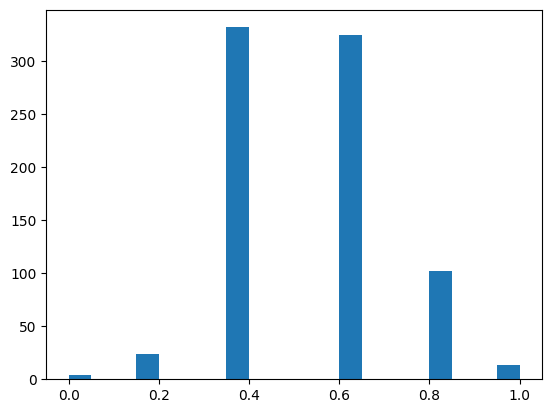

In [13]:
# plot the histogram of x_train min-max scale
plt.hist(X_train_scaled_minmax[:,1], bins=20)

(array([  4.,   1.,   8.,  12.,  13.,  26.,  51.,  89., 104., 141., 115.,
         95.,  51.,  39.,  24.,  12.,   6.,   5.,   3.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

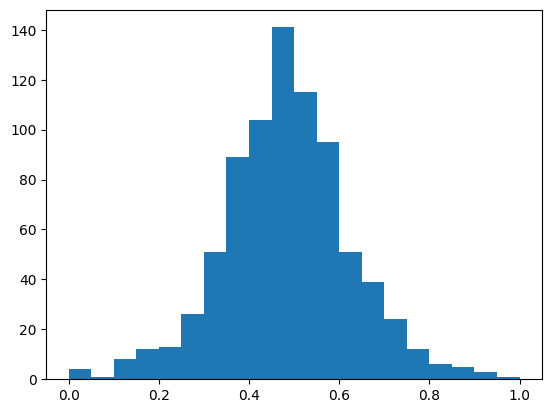

In [14]:
plt.hist(X_train_scaled_minmax[:,2], bins=20)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(WineQT_data)
df = pd.DataFrame(df, columns = WineQT_data.columns)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

## 6. EDA

<Axes: xlabel='density', ylabel='Count'>

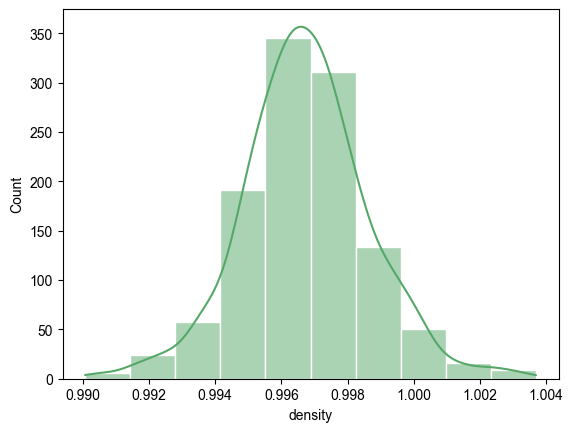

In [16]:
f, ax = plt.subplots(1,1)

sns.set(style='darkgrid')
sns.histplot(data = WineQT_data, x = "density", color='g', bins=10, kde = True, legend=False)

### In this histogram plot analysis  of density of Wine.

<Axes: xlabel='quality', ylabel='alcohol'>

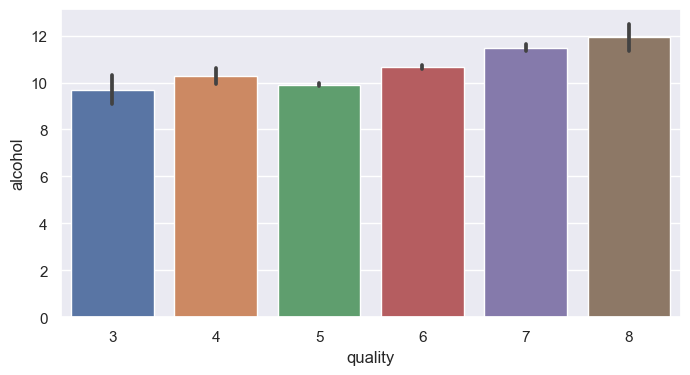

In [17]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'alcohol', data = WineQT_data)

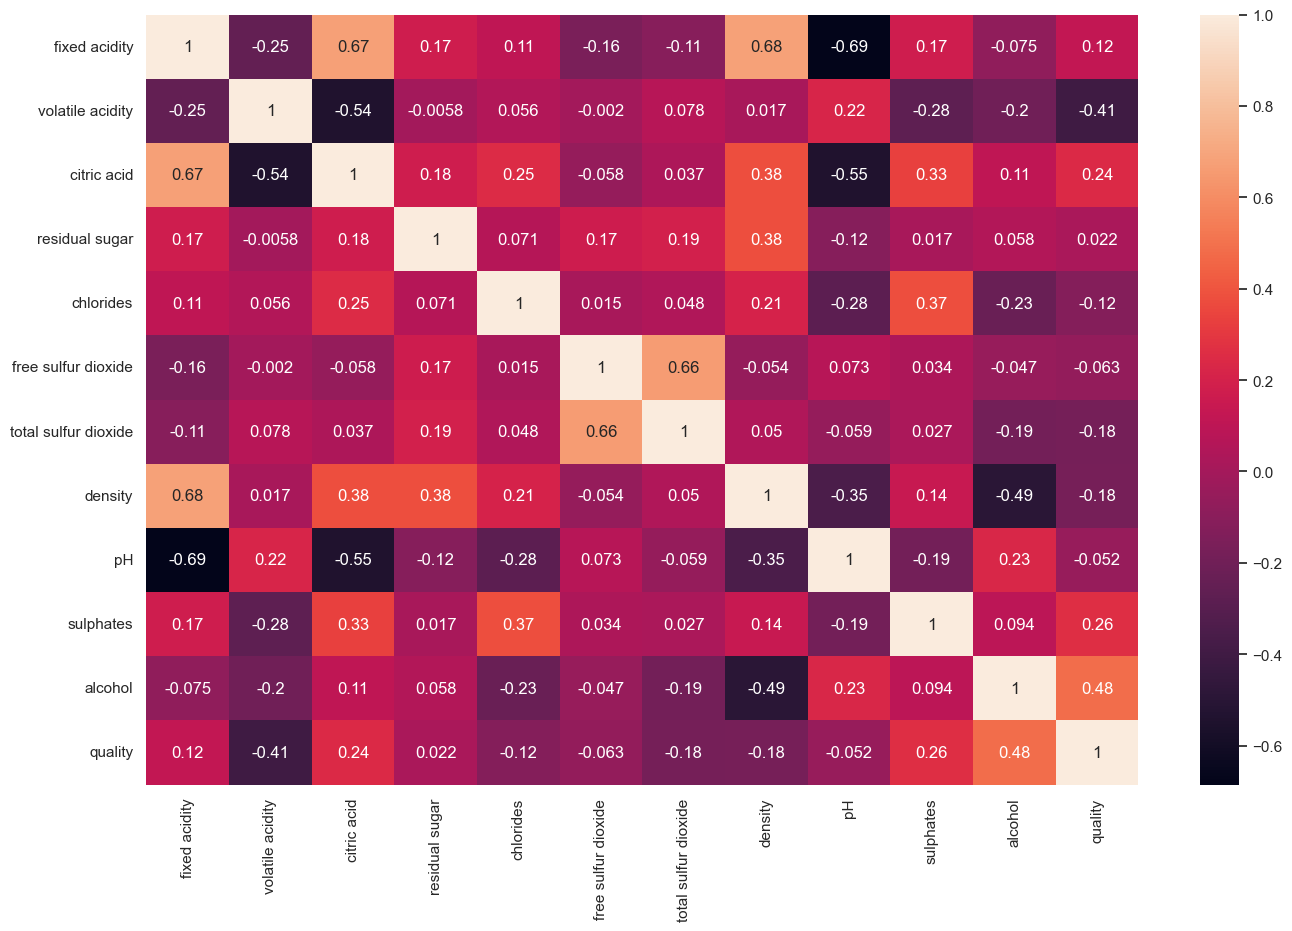

In [18]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(WineQT_data.corr(), annot=True)
plt.show()

## 7. Data splitting

In [19]:
WineQT_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
X = WineQT_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = WineQT_data[['quality']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## 8. Model Selection and Training

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(x_train, y_train)

/opt/anaconda3/envs/ml_basics/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [26]:
model.score(x_test, y_test)

0.5364431486880467

In [27]:
predict = model.predict(x_test)
predict

array([6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,

## 9. Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.5364431486880467

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.78      0.42      0.55       158
           6       0.46      0.89      0.60       131
           7       0.00      0.00      0.00        34
           8       0.00      0.00      0.00         7

    accuracy                           0.54       343
   macro avg       0.21      0.22      0.19       343
weighted avg       0.53      0.54      0.48       343



/opt/anaconda3/envs/ml_basics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ml_basics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/ml_basics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   2,   9,   0,   0],
       [  0,   0,  67,  91,   0,   0],
       [  0,   0,  14, 117,   0,   0],
       [  0,   0,   3,  31,   0,   0],
       [  0,   0,   0,   7,   0,   0]])

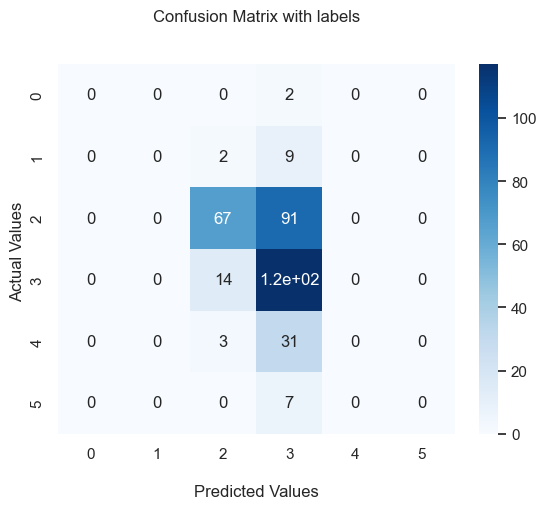

In [31]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## 10. Conclusion

    In this Project, I have build classification model using Wine Quality Dataset. A Build Model help of Support Vector Classifier Then feature scaling, visualized and evaluation through classification report, confusion matrix the performance of the models.  
    
    Please make a comment and let me know how to improve and visualization or something in this Project.